# "Vehicles."

## Part 3: Data Wrangling and Transformation.

* ### StandardScaler

In [15]:
# StandardScaler 
sc = StandardScaler()
dataset_sc = sc.fit_transform(dataset)
dataset_sc = pd.DataFrame(dataset_sc)
dataset_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.160580,0.508950,0.057819,0.270806,1.307291,0.311542,-0.205844,0.136570,-0.224944,0.758332,-0.402383,-0.344935,0.285812,-0.329056,-0.076711,0.380991,-0.313722,0.183957
1,-0.325470,-0.626268,0.121261,-0.835244,-0.595396,0.094079,-0.597112,0.520843,-0.610954,-0.344578,-0.593611,-0.622416,-0.513517,-0.061767,0.533610,0.156925,0.010937,0.452977
2,1.254193,0.833298,1.517005,1.197496,0.546217,0.311542,1.148544,-1.144341,0.933086,0.689401,1.095564,1.104766,1.392577,0.071877,1.550812,-0.403238,-0.151393,0.049447
3,-0.082445,-0.626268,-0.005624,-0.297166,0.165679,0.094079,-0.747600,0.648935,-0.610954,-0.344578,-0.912323,-0.741337,-1.466565,-1.264566,-0.076711,-0.291206,1.634233,1.529056
4,-1.054545,-0.139746,-0.766939,1.077923,5.239511,9.444962,-0.597112,0.520843,-0.610954,-0.275646,1.669245,-0.650731,0.408786,7.288670,0.533610,-0.179173,-1.450029,-1.699181


* ### Creating datasets for ML part

In [16]:
# set 'X' for features' and y' for the target ('Class').
X = dataset_sc.copy()
y = target

* ### 'Train\Test' split

In [17]:
# apply 'Train\Test' splitting method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=0)

In [18]:
# print shape of X_train and y_train
X_train.shape, y_train.shape

((642, 18), (642,))

In [19]:
# print shape of X_test and y_test
X_test.shape, y_test.shape

((204, 18), (204,))

## Part 4: Machine Learning.

* ### Build, train and evaluate model

* SVC model

In [20]:
classifier = SVC(kernel='linear', decision_function_shape='ovo', tol=0.03)
classifier.fit(X_train, y_train)
SVC_pred = classifier.predict(X_test)
accuracy = accuracy_score(SVC_pred, y_test)
print("Accuracy:", accuracy * 100)

Accuracy: 80.88235294117648


* ### Classification report

In [21]:
print("SVC Classification Report: \n", classification_report(y_test, SVC_pred, digits = 6))

SVC Classification Report: 
               precision    recall  f1-score   support

         bus   0.901961  1.000000  0.948454        46
        opel   0.653061  0.666667  0.659794        48
        saab   0.727273  0.634921  0.677966        63
         van   0.959184  1.000000  0.979167        47

    accuracy                       0.808824       204
   macro avg   0.810370  0.825397  0.816345       204
weighted avg   0.802632  0.808824  0.804077       204



Вывод:
* SVC linear model показывает достаточно хорошую метрику accuracy = 80.8% или 80.88235294117648;
* Количество примеров классов представленных в тестовом сете данных (204 примера): "bus"=46, "opel"=48, "saab"=63, "van"=47;
* По метрике f1-score сразу можно сказать, что лучше всех определился класс "van", за ним класс "bus", далее класс "saab", и хуже всех класс "opel". Давайте проверим это на confusion matrix.

* ### Confusion matrix

По диагонали (от верха слева до низа справа или самые темные квадраты с цифрами): кол-во верно предсказанных данных в определенном классе;

По вертикали: сколько раз данный класс неверно предсказался в других классах (не учитывая диагональное число, суммируем все числа);

По горизонтали: сколько раз другие классы неверно предсказались в данном классе (не учитывая диагональное число, суммируем все числа);

SVC Confusion Matrix


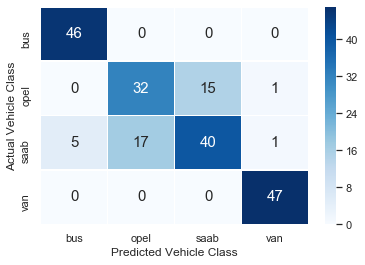

In [22]:
# confusion matrix of SVC model
labels = ["bus", "opel", "saab", "van"]
cm = confusion_matrix(y_test, SVC_pred, labels=None)
print('SVC Confusion Matrix')

# visualisation of matrix
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(df_cm, annot=True, fmt="d", cmap = 'Blues', linewidths = 0.5, annot_kws = {'size': 15})
plt.ylabel("Actual Vehicle Class")
plt.xlabel("Predicted Vehicle Class")    
plt.show()

* ### Misclassification plot

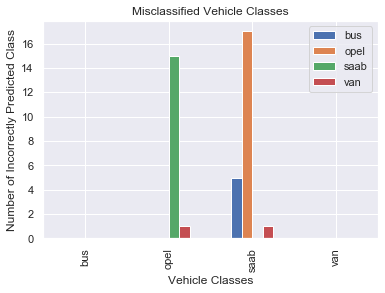

In [23]:
# misclassification vehicle plot 
for label in df_cm.columns:
    df_cm.at[label, label] = 0
    
ax = df_cm.plot(kind="bar", title="Misclassified Vehicle Classes")
ax.set_xlabel("Vehicle Classes")
ax.set_ylabel("Number of Incorrectly Predicted Class")    
plt.show()

Вывод:
* класс "van": _верно определен_ 47 раз из 47 примеров; _неверно определен в других классах_ 2 раза, _другие классы неверно определены в данном классе_ 0 раз.
* класс "bus": _верно определен_ 46 раз из 46 примеров; _неверно определен в других классах_ 5 раз, _другие классы неверно определены в данном классе_ 0 раз.
* класс "saab": _верно определен_ 40 раз из 63 примеров; _неверно определен в других классах_ 15 раз, _другие классы неверно определены в данном классе_ 23 раз.
* класс "opel": _верно определен_ 32 раза из 48 примеров; _неверно определен в других классах_ 17 раз, _другие классы неверно определены в данном классе_ 16 раз.


* ### Comparison table between Actual 'Class' and Predicted 'Class'

In [24]:
# comparison table between Actual 'Class' and Predicted 'Class'
actualvspredicted = pd.DataFrame({"Actual Vehicle Class":y_test,"SVC Predicted Vehicle Class":SVC_pred})
actualvspredicted.head(10)

,Actual Vehicle Class,SVC Predicted Vehicle Class
506,saab,opel
222,bus,bus
612,opel,van
730,opel,opel
661,saab,saab
577,opel,saab
31,saab,van
145,opel,opel
794,bus,bus
416,bus,bus


##  Conclusion.

In [25]:
# submission of .csv file with test predictions
sub = pd.DataFrame()
sub['ID'] = X_test.index
sub['Class'] = SVC_pred
sub.to_csv('VehiclesPredictionsTest.csv', index=False)

**Question**: Определите класс транспортного средства по набору данных, описывающих геометрические особенности силуэтов транспортных средств, полученных по фотографиям для распознавания изображений (use multi-class classification; check balance of classes; calculate perdictions).

**Answers**:

1. Multi-class classification was applied.

2. Classes were balanced in our dataset. 
    
3. SVC model was used for ML process.

4. Result: 
    * Train/Test split: test_size=0.24, random_state=0;
    * SVC linear model показывает достаточно хорошую метрику accuracy = 80.8% или 80.88235294117648;
    * Сonfusion matrix показывает, что из 204 примеров тестовых данных были верно определены 165 примеров и неверно определены 39 примеров;
    * Сonfusion matrix так же показывает, что самыми хорошо определяемыми классами являются "van" и "bus", а самыми трудно определяемыми "saab" и "opel".